In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from time import perf_counter

df = pd.read_csv('ccdefault.csv',header=None)
df.dropna()
X=df.iloc[1:, 1:-1]
y=df.iloc[1:, -1]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [26]:
#train test sample split and standarlization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Wincy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Wincy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Wincy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


In [28]:
rmse_test = []
number_of_estimator = []
accuracy_test = []
run_time = []
for n in range(10,200,10):
    start  = perf_counter()
    rf = RandomForestClassifier(n_estimators=n,random_state=2)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    accuracy_test.append(np.mean(cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1)))
    rmse_test.append((MSE(y_test, y_pred))**0.5)
    number_of_estimator.append(n)
    end = perf_counter()
    t = end - start 
    run_time.append(t)
    
n_optimal_1=accuracy_test.index(np.max(accuracy_test))+1
n_optimal_2=rmse_test.index(np.min(rmse_test))+1

print(n_optimal_1)
print(n_optimal_2)

12
15


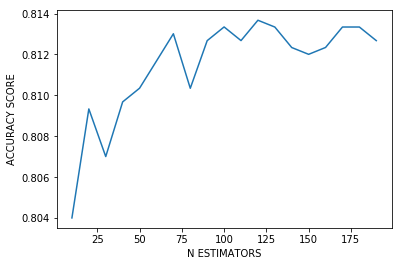

In [31]:
plt.plot(number_of_estimator, accuracy_test)
plt.xlabel('N ESTIMATORS')
plt.ylabel('ACCURACY SCORE')
plt.show()

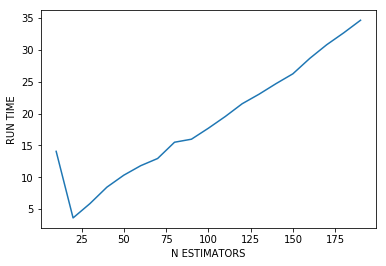

In [32]:
plt.plot(number_of_estimator, run_time)
plt.xlabel('N ESTIMATORS')
plt.ylabel('RUN TIME')
plt.show()

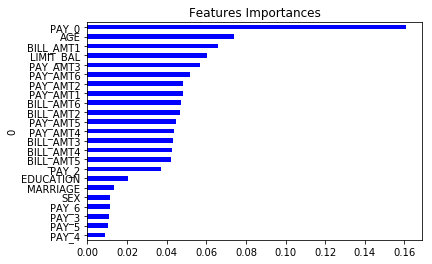

In [35]:
#use the best n_estimators= 120
rf = RandomForestRegressor(n_estimators=120,random_state=2)
rf.fit(X_train,y_train) 
#X_train =  pd.DataFrame(X_train)
importances = pd.Series(data=rf.feature_importances_,index= df.iloc[0, 1:-1] )
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

In [34]:
print("My name is YUNXI WU")
print("My NetID is: yunxiw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is YUNXI WU
My NetID is: yunxiw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
